In [ ]:
from google.colab import files
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
uploaded=files.upload()

Saving heart.csv to heart.csv


In [ ]:
dataset=pd.read_csv('heart.csv')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
dataset.keys

<bound method NDFrame.keys of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


DATA PREPROCESSING

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

ANALYSIS OF TARGET COLUMN

In [ ]:
target=dataset['target']
target.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
df=target.value_counts
df

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

DATA VISUALIZATION



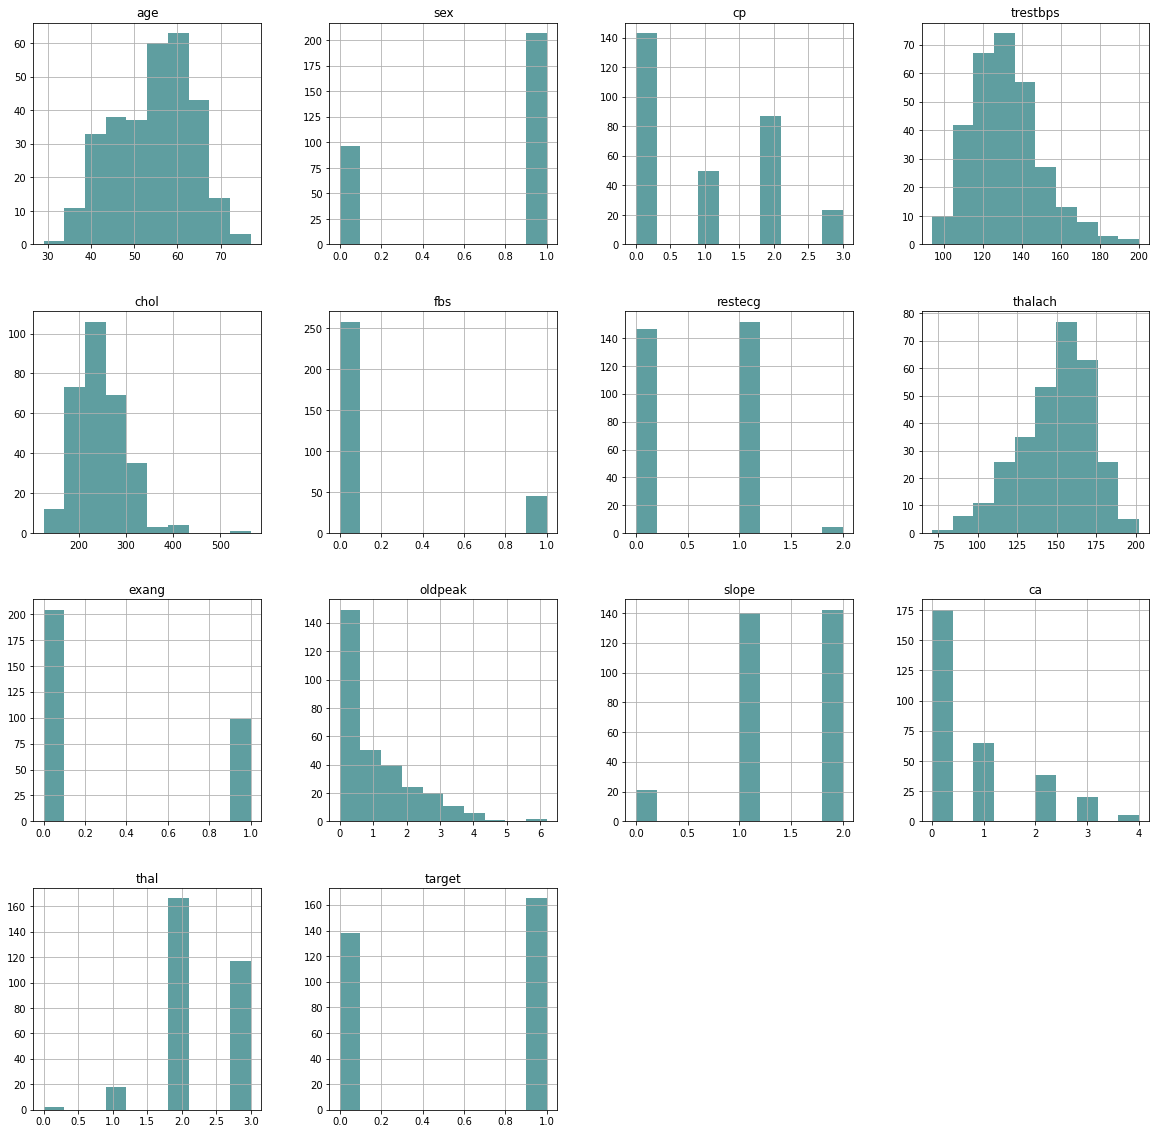

In [ ]:
dataset_hist = dataset.hist(figsize = (20,20), color ="#5F9EA0")


DATA VISUALIZATION OF TARGET COLUMNS

Text(0, 0.5, 'chol')

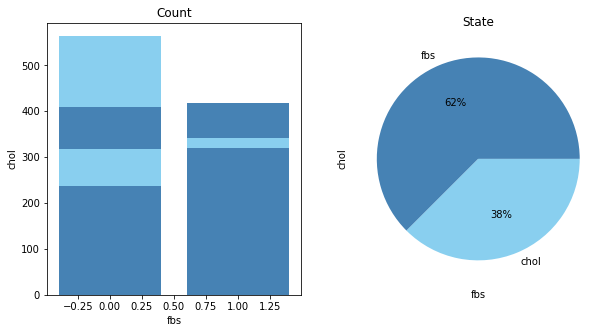

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

colors = ["#4682B4", "#89CFEF"]
labels = ["fbs", "chol"]

axs[0].bar(dataset["fbs"], dataset["chol"], color=colors)
axs[0].set_title("Count")
axs[0].set_xlabel("fbs")
axs[0].set_ylabel("chol")
data = [5,3]
colors = ["#4682B4", "#89CFEF"]
labels = ["fbs", "chol"]
autopct = "%1.0f%%"
axs[1].pie(data, labels=labels, colors=colors, autopct=autopct)
axs[1].set_title("State")
axs[1].set_xlabel("fbs")
axs[1].set_ylabel("chol")

In [ ]:
corr = pd.DataFrame(dataset[dataset.columns.drop('fbs')].corrwith(dataset['fbs']).sort_values(ascending=False), columns=['Correlation'])
cm = sns.light_palette("#5F9EA0", as_cmap=True)
high_corr = corr.style.background_gradient(cmap=cm)
high_corr

,Correlation
trestbps,0.177531
ca,0.137979
age,0.121308
cp,0.094444
sex,0.045032
exang,0.025665
chol,0.013294
oldpeak,0.005747
thalach,-0.008567
target,-0.028046


SPLITTING DATA INTO TRAIN AND TEST

In [ ]:
x = dataset.drop(['fbs'], axis=1).values
y = dataset['fbs'].values
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


MODEL BUILDING
KNN CLASSIFICATION

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
print('Score:',knn.score(x_train,y_train))
y_predict=knn.predict(x_test)
print('Mean:',np.mean(y_predict==y_test))

Score: 0.871900826446281
Mean: 0.7540983606557377


In [ ]:
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_predict})
data[:10]

,y_Test,y_pred
0,0,0
1,0,1
2,1,0
3,0,0
4,1,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


Confusion Matrix:
[[46  1]
 [14  0]]


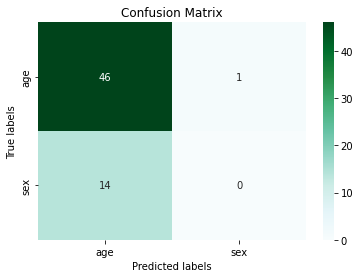

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, ax = ax, cmap = "BuGn");
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["age", "sex"])
ax.yaxis.set_ticklabels(["age", "sex"]);

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86        47
           1       0.00      0.00      0.00        14

    accuracy                           0.75        61
   macro avg       0.38      0.49      0.43        61
weighted avg       0.59      0.75      0.66        61



LINEAR SUPPORT VECTOR CLASSIFICATION

In [ ]:
svm=LinearSVC()
svm.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
print('Score:',svm.score(x_train,y_train))
y_pred=svm.predict(x_test)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print('Root mean squared error:',rmse)

Score: 0.1322314049586777
Root mean squared error: 0.8777766249329544


In [ ]:
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:10]

,y_Test,y_pred
0,0,1
1,0,1
2,1,1
3,0,1
4,1,1
5,0,1
6,0,1
7,1,1
8,0,1
9,0,1


Confusion Matrix:
[[ 0 47]
 [ 0 14]]


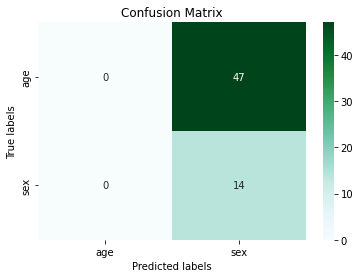

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn")
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["age", "sex"]);
ax.yaxis.set_ticklabels(["age", "sex"]);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.23      1.00      0.37        14

    accuracy                           0.23        61
   macro avg       0.11      0.50      0.19        61
weighted avg       0.05      0.23      0.09        61



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
results = pd.DataFrame({"Model": ["KNN","Linear SVC"],
"Score": [knn.score(x_train, y_train),svm.score(x_train, y_train)]})
result_df = results.sort_values(by="Score", ascending=False)
print(result_df)

        Model     Score
0         KNN  0.871901
1  Linear SVC  0.132231
